In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Obs data within half mass radii
# McConnachie 2012, Simon+2019

Labels=["Seg", "Will1", "SegII", "CBer", "BooII","UMajII", "CVenII", "LeoV", "TucIV", "GrusII","UMaj1"]
StellarUFD = [340,1e3,860,3.7e3, 1e3, 4.1e3, 7.9e3, 1.1e4, 1400, 2100,1.4e4]
MDynUFD = [2.6e5,2.7e5,2.3e5,9.4e5,3.3e6,3.9e6,9e5,1.1e6, 2.2e6, 3.5e5,1.1e6]

In [6]:
# Mdyn-to-stellar mass ratio
MassToLight = np.zeros(len(MDynUFD))
ii=0
for i in MDynUFD:
    MassToLight[ii] = i/StellarUFD[ii]
    ii= ii+1
    
print(MassToLight)

[ 764.70588235  270.          267.44186047  254.05405405 3300.
  951.2195122   113.92405063  100.         1571.42857143  166.66666667
   78.57142857]


In [9]:
# Simulation Data  Jeon 2017 
HaloNumberJ17 = [1,2,3,4,5,6]
StellarSimJ17 = [ 4.3e4, 3.8e4, 8.2e4, 13e4, 20e4, 88.6e4]
MvirJ17 = [1.53e9,1.53e9,1.6e9,2.21e9,3.15e9,3.95e9]
MgasTotJ17 = [1.26e6, 1.28e6, 1.83e6, 2.09e7, 1.58e6, 2.6e7]


In [11]:
# Mdyn-to-stellar mass ratio
MassToLightJ17 = np.zeros(len(HaloNumberJ17))
ii=0
for i in MvirJ17:
    MassToLightJ17[ii] = i/StellarSimJ17[ii]
    ii= ii+1
    
print(MassToLightJ17)

[35581.39534884 40263.15789474 19512.19512195 17000.
 15750.          4458.23927765]


In [15]:
# Simulation Data Jeon 2020
HaloNumberJ20 = [1,2,3,4,5,6,7,8]
StellarSimJ20 = [3811.88, 5241.45, 7623.77, 952.994, 5717, 9530, 2382, 952.98]
MvirJ20 = [1.5e8, 1.36e8, 1.2e8, 1.15e8, 1.11e8, 8.77e7, 2.45e7, 2e7]
# parsecs
RhalfJ20 = [724.52137, 183.6, 158.67, 82.05, 65.35, 111.53, 106.82, 42.5]
DispJ20 = [3.11, 1.25, 2.01, 0, 2.23, 5.04, 0.71, 0]

In [16]:
# Mdyn-to-stellar mass ratio
MassToLightJ20 = np.zeros(len(HaloNumberJ20))
ii=0
for i in MvirJ20:
    MassToLightJ20[ii] = i/StellarSimJ20[ii]
    ii= ii+1
    
print(MassToLightJ20)

[ 39350.66161579  25947.01847771  15740.24400002 120672.32322554
  19415.77750568   9202.51836306  10285.47439127  20986.79930324]


In [25]:
# Dynamical mass from velocity dispersion
G = 4.4988e-6
etaPlummer = 2.6 

def DynMass(eta,sigma,rc):
        #modified uniform sphere solution to virial theorem
    # eta - deviation from unifrom sphere
    # sigma= velocity dispersion
    # rc = half light radius in kpc 
    return 6*eta*sigma**2*rc/G



In [27]:
# Mdyn and 
# Mdyn-to-stellar mass ratio
MDynJ20 = np.zeros(len(HaloNumberJ20))
MDynToLightJ20 = np.zeros(len(HaloNumberJ20))
ii=0
for i in DispJ20:
    MDynJ20[ii] = DynMass(etaPlummer,i,RhalfJ20[ii]/1e3)
    MDynToLightJ20[ii] = MDynJ20[ii]/StellarSimJ20[ii]
    ii= ii+1
    
print(MDynJ20)
print(MDynToLightJ20)

[24299642.79970686   994765.27073886  2222874.0120032         0.
  1126894.42384636  9823826.57348627   186722.72766071        0.        ]
[6374.71347464  189.7881828   291.57149442    0.          197.11289555
 1030.83174958   78.38905443    0.        ]


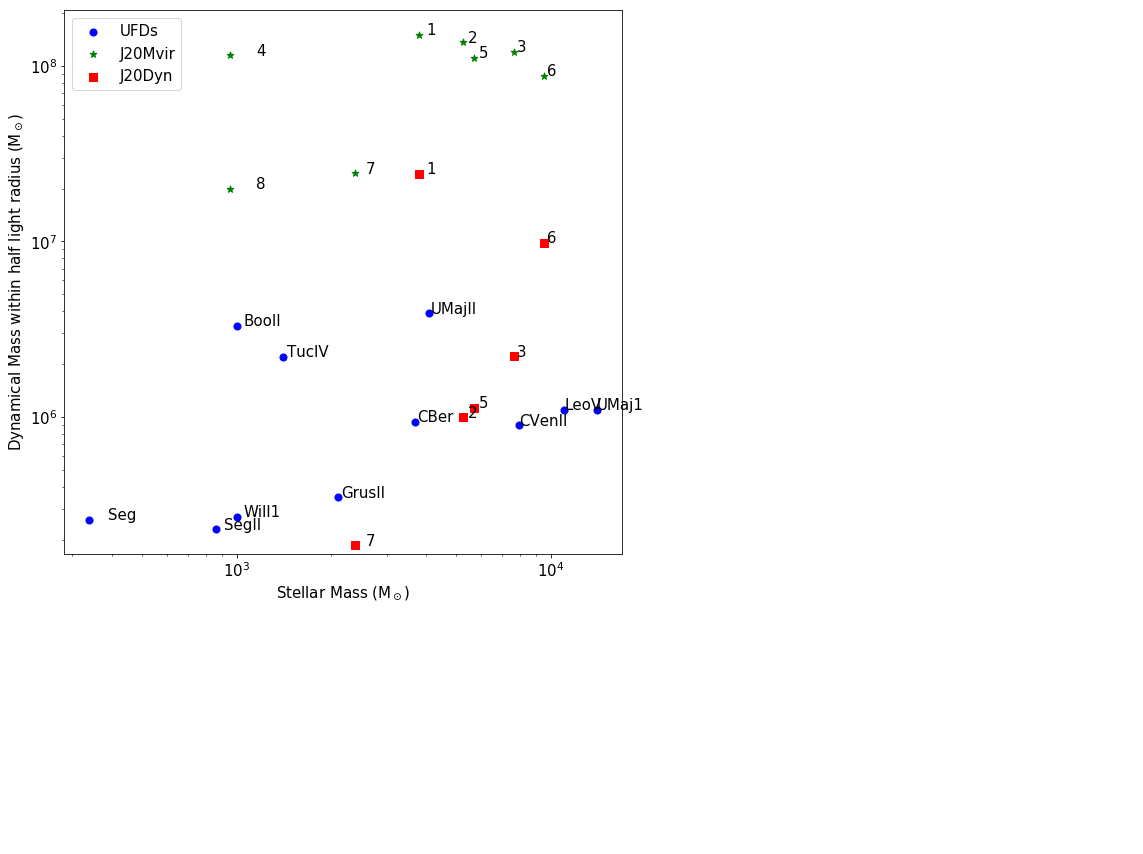

In [52]:

fig = plt.figure(figsize=(10,10))

ax = plt.subplot(111)

ax.scatter(StellarUFD, MDynUFD,s=50,color='b',marker='o', label = 'UFDs') #, labels=Labels)
#ax.scatter(StellarSimJ17, MvirJ17,s=50,color='k',marker='o', label='J17') #, labels=Labels)
ax.scatter(StellarSimJ20, MvirJ20,s=50,color='g',marker='*', label='J20Mvir') #, labels=Labels)
ax.scatter(StellarSimJ20, MDynJ20,s=50,color='r',marker='s', label='J20Dyn') #, labels=Labels)

for i, txt in enumerate(Labels):
    ax.annotate(txt, (StellarUFD[i]+50, MDynUFD[i]+200))
for i, txt in enumerate(HaloNumberJ20):
    ax.annotate(txt, (StellarSimJ20[i]+200, MDynJ20[i]-200))
    ax.annotate(txt, (StellarSimJ20[i]+200, MvirJ20[i]-200))

#for i, txt in enumerate(HaloNumberJ17):
#    ax.annotate(txt, (StellarSimJ17[i]+50, MvirJ17[i]+200))

plt.xlabel('Stellar Mass (M$_\odot$)')
plt.ylabel('Dynamical Mass within half light radius (M$_\odot$)')
#plt.ylabel('DM Mass (10$^4$ M$_\odot$ per 11 km/s bin)', fontsize=20)
#plt.xlabel('Heliocentric Velocity (km/s)', fontsize=20)

plt.legend(loc='upper left')

plt.yscale('log')
plt.xscale('log')    
#plt.xlim(700,900)
#plt.ylim(1e5,1e7)
plt.rcParams.update({'font.size': 15})

plt.savefig('UFD_MassToLight.png', format='png', dpi=350)

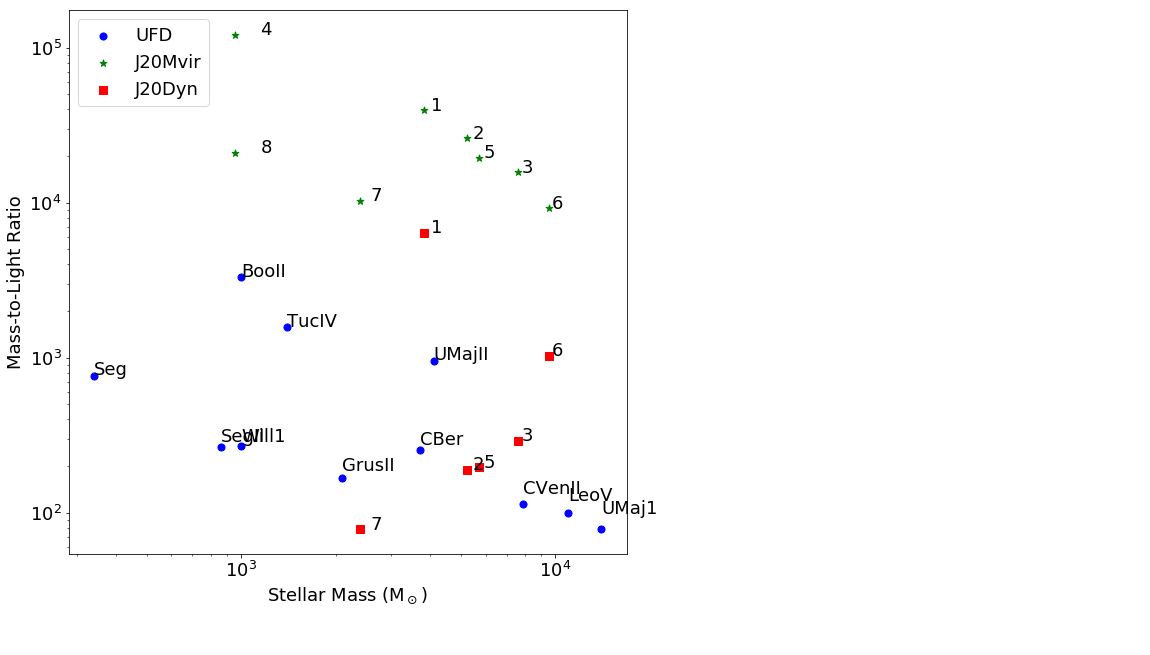

In [48]:

fig = plt.figure(figsize=(10,10))

ax = plt.subplot(111)


ax.scatter(StellarUFD,MassToLight,s=50,color='b',marker='o', label='UFD') #, labels=Labels)
#ax.scatter(StellarSimJ17, MassToLightJ17,s=50,color='k',marker='o', label='J17') #, labels=Labels)
ax.scatter(StellarSimJ20, MassToLightJ20,s=50,color='g',marker='*', label='J20Mvir') #, labels=Labels)
ax.scatter(StellarSimJ20, MDynToLightJ20,s=50,color='r',marker='s', label='J20Dyn') #, labels=Labels)

for i, txt in enumerate(Labels):
    ax.annotate(txt, (StellarUFD[i], MassToLight[i]+20))
for i, txt in enumerate(HaloNumberJ20):
    ax.annotate(txt, (StellarSimJ20[i]+200, MDynToLightJ20[i]))
    ax.annotate(txt, (StellarSimJ20[i]+200, MassToLightJ20[i]))

plt.ylabel('Mass-to-Light Ratio')
plt.xlabel('Stellar Mass (M$_\odot$)')
#plt.ylabel('DM Mass (10$^4$ M$_\odot$ per 11 km/s bin)', fontsize=20)
#plt.xlabel('Heliocentric Velocity (km/s)', fontsize=20)

plt.legend(loc='upper left')

plt.yscale('log')
plt.xscale('log')

#plt.xlim(700,900)
#plt.ylim(10,1e4)
plt.rcParams.update({'font.size': 18})

plt.savefig('UFD_MassToLightRatio.png', format='png', dpi=350)